In [8]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# 指定数据集路径
dataset_path = '/media/lu/mydata/cmp/OpenMMLabCamp-1/data/flower_dataset'
os.chdir(dataset_path)
os.listdir()

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
df = pd.DataFrame()
for flower in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(flower)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':flower, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(flower, file), '读取错误')
    os.chdir('../')
os.chdir('../')

  0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_6372/1632229105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':flower, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
/tmp/ipykernel_6372/1632229105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':flower, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
/tmp/ipykernel_6372/1632229105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':flower, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
/tmp/ipykernel_6372/1632229105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

In [ ]:
df

,类别,文件名,图像宽,图像高
0,daisy,34524074031_e42b9b1acd_n.jpg,159,240
1,daisy,100080576_f52e8ee070_n.jpg,320,263
2,daisy,10140303196_b88d3d6cec.jpg,500,313
3,daisy,10172379554_b296050f82_n.jpg,320,215
4,daisy,10172567486_2748826a8b.jpg,500,333
...,...,...,...,...
2843,tulip,7166614014_5f0f8d715b_n.jpg,240,156
2844,tulip,7481217920_6f65766a1c_n.jpg,320,240
2845,tulip,8673416166_620fc18e2f_n.jpg,320,240
2846,tulip,8712270243_8512cf4fbd.jpg,500,333


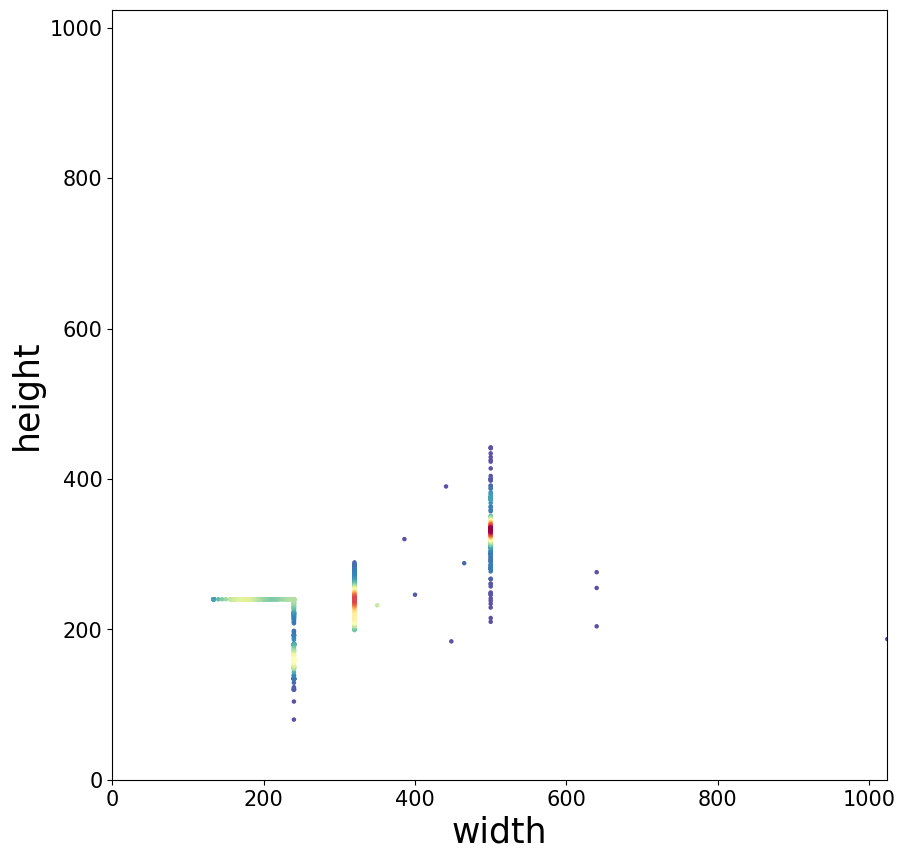

In [ ]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [ ]:
dataset_name = dataset_path.split('_')[0]
print('数据集', dataset_name)

数据集 /media/lu/mydata/cmp/OpenMMLabCamp-1/data/flower


In [ ]:
classes = os.listdir(dataset_path)

In [ ]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
len(classes)

5

In [ ]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

# 在 train 和 test 文件夹中创建各类别子文件夹
for flower in classes:
    os.mkdir(os.path.join(dataset_path, 'train', flower))
    os.mkdir(os.path.join(dataset_path, 'val', flower))

## 划分训练集、测试集，移动文件

In [ ]:
test_frac = 0.2  # 测试集比例

In [ ]:
df = pd.DataFrame()
print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))

        类别              训练集数据个数            测试集数据个数      


In [ ]:
import shutil
import random

In [ ]:

for flower in classes: # 遍历每个类别

    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, flower)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱

    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, flower, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', flower, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, flower, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', flower, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走

        类别              训练集数据个数            测试集数据个数      


In [ ]:
shutil.rmtree(old_dir) # 删除文件夹

In [ ]:
df = pd.DataFrame()
print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))
# 工整地输出每一类别的数据个数
print('{:^18} {:^18} {:^18}'.format(flower, len(trainset_images), len(testset_images)))
    
# 保存到表格中
df = df.append({'class':flower, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset']


        类别              训练集数据个数            测试集数据个数      
      tulip               468                117        


/tmp/ipykernel_6372/659489256.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':flower, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)


In [ ]:
dataset_path

'/media/lu/mydata/cmp/OpenMMLabCamp-1/data/flower_dataset'

In [75]:
dataset_path='/media/kaai/mydata/cmp/data/flower_split/train'

In [76]:

path_list = os.listdir(dataset_path)

In [77]:
path_list

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [79]:
f = open('classes.txt', 'w+')
for i in path_list:
    f.write(str(i)+ '\n')

In [80]:
f.close()

In [ ]:
def text_create(file_path,name):
    file_path= file_path
    full_path= file_path+'/'+name+'.txt'
    file = open(full_path,'w')


In [ ]:
file_path = '/media/kaai/mydata/cmp/data/flower_split'
name = 'train'
text_create(file_path,name)

In [1]:
import os
import shutil
from tqdm import tqdm

In [11]:
path_dir= '/media/lu/mydata/cmp/mmclassification/data/flower_dataset/train'
file_name = 'daisy'
f = open('train_1.txt', 'w+')  # 没有则创建txt文件

In [14]:
fileList = os.listdir(os.path.join(path_dir,file_name))
# print(fileList)

In [21]:
f = open('train_1.txt', 'w+')  # 没有则创建txt文件
f_2 = open('val_1.txt', 'w+')  # 没有则创建txt文件 #换名字

In [26]:
path_dir_train = '/media/lu/mydata/cmp/mmclassification/data/flower_dataset/train'
path_dir_val = '/media/lu/mydata/cmp/mmclassification/data/flower_dataset/val'
file_name = 'tulip' #换名字
fileList_train = os.listdir(os.path.join(path_dir_train,file_name))
fileList_val = os.listdir(os.path.join(path_dir_val,file_name))
classes= ' 4'
for file in fileList_train:
        f.write(file_name+'/'+str(file) + classes + '\n')  # 保留文件后缀 #换cls的种类
for file_2 in fileList_val:        
        f_2.write(file_name+'/'+str(file_2) + classes + '\n')

In [27]:
f.close()
f_2.close()

In [19]:
img_path = os.path.join(path_dir,file_name)
img_list = os.listdir(img_path)
print(img_path)
print(img_list)

/media/kaai/mydata/cmp/data/flower_split/val/tulip (copy)
['112428665_d8f3632f36_n.jpg', '112951022_4892b1348b_n.jpg', '11441893003_ab83672800.jpg', '11746276_de3dec8201.jpg', '11746548_26b3256922_n.jpg', '12873145295_438b8197a7_n.jpg', '12883412424_cb5086b43f_n.jpg', '12916017805_1cde91a891_n.jpg', '13530796853_e5993f57d6_n.jpg', '13910471347_30c8bf4de1_n.jpg', '13910604778_e5f4588420.jpg', '13953090784_0c7d7a904e.jpg', '13976191172_6f23a0b313.jpg', '14024864234_713158c27f_n.jpg', '14026857634_500d7b41d6_m.jpg', '14064735842_a946fba1ef_n.jpg', '14068200854_5c13668df9_m.jpg', '14069841138_e2b403f44f_n.jpg', '14069841698_a5dff9cfd2_n.jpg', '14084211971_0f921f11fe_n.jpg', '3600510954_a51bfc5440_n.jpg', '3614805920_7a6610aa4b_n.jpg', '3626132563_d955973447_n.jpg', '3990746027_338ee436d2_n.jpg', '3991423020_9aaf2b5974_n.jpg', '4209052442_7e754f617c_n.jpg', '4290566894_c7f061583d_m.jpg', '4312181724_16dab26afb_n.jpg', '440714501_9f8268e1b0.jpg', '444963906_e41492b692.jpg', '450607536_4fd9f5

In [21]:

img_path_name=[]
for i in img_list:
    img_path_name.append(i.split(".")[0])
print(img_path_name)

['112428665_d8f3632f36_n', '112951022_4892b1348b_n', '11441893003_ab83672800', '11746276_de3dec8201', '11746548_26b3256922_n', '12873145295_438b8197a7_n', '12883412424_cb5086b43f_n', '12916017805_1cde91a891_n', '13530796853_e5993f57d6_n', '13910471347_30c8bf4de1_n', '13910604778_e5f4588420', '13953090784_0c7d7a904e', '13976191172_6f23a0b313', '14024864234_713158c27f_n', '14026857634_500d7b41d6_m', '14064735842_a946fba1ef_n', '14068200854_5c13668df9_m', '14069841138_e2b403f44f_n', '14069841698_a5dff9cfd2_n', '14084211971_0f921f11fe_n', '3600510954_a51bfc5440_n', '3614805920_7a6610aa4b_n', '3626132563_d955973447_n', '3990746027_338ee436d2_n', '3991423020_9aaf2b5974_n', '4209052442_7e754f617c_n', '4290566894_c7f061583d_m', '4312181724_16dab26afb_n', '440714501_9f8268e1b0', '444963906_e41492b692', '450607536_4fd9f5d17c_m', '4508346090_a27b988f79_n', '4521037085_70d5802e1d_m', '4550805310_5f81c9ba08_n', '4579128789_1561575458_n', '4582198748_20fa7caaa1', '480228053_513791d474', '489506904_9